<a href="https://colab.research.google.com/github/hyuk-k/hyuk-k/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2차원 데이터 정리
## 두 데이터 사이의 관계를 나타내는 지표

- 데이터 준비

In [7]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

In [8]:
df = pd.read_csv('scores_em.csv',
                 index_col = 'student number')

In [9]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                          'mathematics':ma_scores},
                         index=pd.Index(['A','B','C','D','E',
                                         'F','G','H','I','J'],
                                        name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


- 영어 점수가 높은 학생일수록 수학 점수가 높은 경향이 있따면 영어 점수와 수학 점수는 양의 상관 관계
- 영어 점수가 높은 학생일수록 수학 점수가 낮은 경향이 있다면 영어 점수와 수학 점수는 음의 상관 관계
- 영어 점수가 수학 점수에 직접적으로 영향을 미치지 않을 때, 영어 점수와 수학 점수는 무상관

# 두 데이터 사이의 관계를 나타내는 지표
## 공분산
- 중간의 가로선과 세로선은 수학과 영어 평균 점수
- 영어 점수와 수학 점수는 양의 상관 관계
- 직사각형의 가로길이는 영어 점수의 편차, 세로는 수학 점수의 편차
- 공분산은 면적, 음의 면적도 가능(음의 상관)

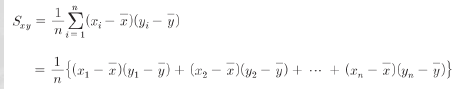

In [10]:
summary_df = scores_df
summary_df['english_deviation'] = \
  summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = \
  summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviation'] = \
  summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [11]:
summary_df['product of deviation'].mean()

62.800

- numpy의 cov 함수 반환값은 공분산 행렬(분산공분산 행렬)

In [12]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

- 1행 2열, 2행 1열 성분이 영어 수학의 공분산

In [13]:
cov_mat[0,1], cov_mat[1,0]

(62.800, 62.800)

## 상관계수
- 공분산의 단위는 직감적으로 이해하기 어려우므로, 단위에 의존하지 않는 상관을 나타내는 지표
- 시험 점수간의 공분산(점수x점수), 키와 점수(cmX점수)
- 상관계수는 공분산을 각 데이터의 표준편차로 나누어 단위에 의존하지 않음
- 양의 상관은 1에 가까워지고, 음의 상관은 -1에 가까워지고, 무상관은 0

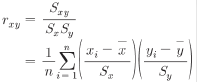

- 상관계수가 -1일 때와 1일 때 데이터는 완전히 직선상에 놓임

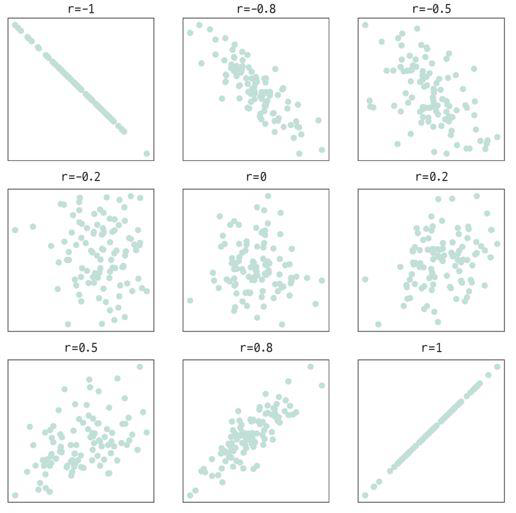

- 수식대로 계산하는 영어 점수와 수학 점수의 상관계수

In [14]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] / \
  (np.std(en_scores) * np.std(ma_scores))

0.819

- numpy의 corrcoef 함수(상관행렬의 [0,1][1,0] 성분)

In [15]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

- DataFrame의 corr 매서드

In [16]:
scores_df.corr()

,english,mathematics,english_deviation,mathematics_deviation,product of deviation
english,1.000,0.819,1.000,0.819,-0.018
mathematics,0.819,1.000,0.819,1.000,0.068
english_deviation,1.000,0.819,1.000,0.819,-0.018
mathematics_deviation,0.819,1.000,0.819,1.000,0.068
product of deviation,-0.018,0.068,-0.018,0.068,1.000


# 2차원 데이터의 시각화
## 산점도
- 산점도

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

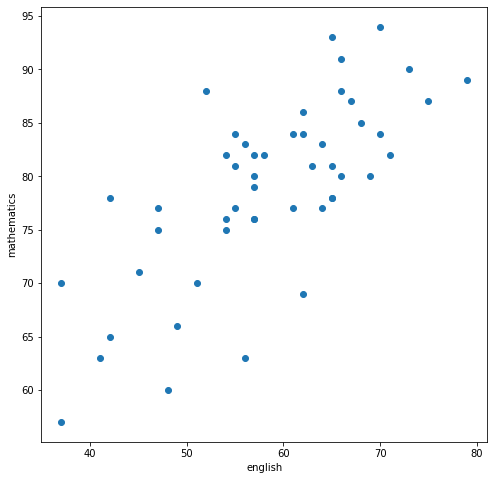

In [18]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
# 산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

## 회귀직선
- 회귀직선

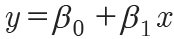

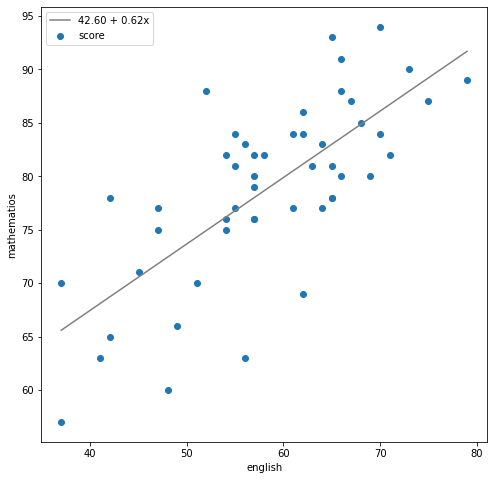

In [19]:
# 계수 B_0와 B_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
# B_0 + B_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
# 직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematios')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')
# 범례의 표시
ax.legend(loc='upper left')

plt.show()

## 히트맵
- 히스토그램의 2차원 버전으로 색을 이용해 표현하는 그래프
- 영어 점수 35점부터 80점, 수학점수 55점부터 95점까지 5점 간

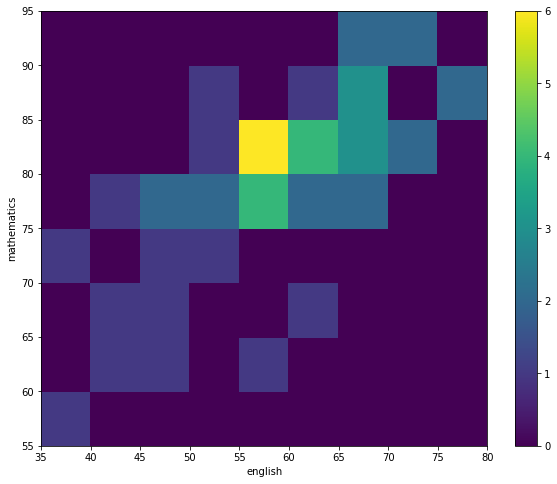

In [20]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9,8], range=[(35,80),(55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)
plt.show()

- 색이 진한 영역일수록 많은 학생이 분포

# 앤스컴의 예
## 동일한 지표, 다른 데이터
- 동일한 지표를 가지고 있지만 그림으로 표현하면 전혀 다른 데이터

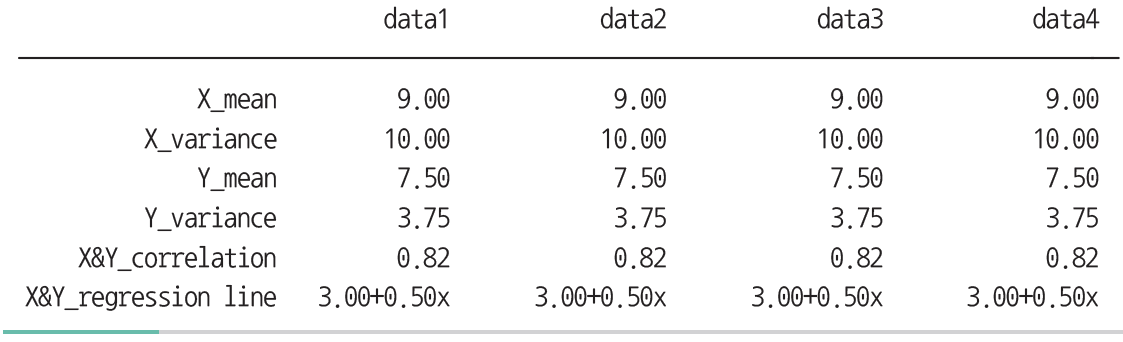

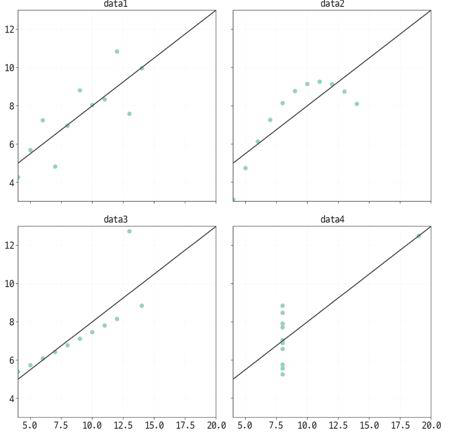

In [21]:
# npy 형식으로 저장된 numpy array를 읽음
anscombe_data = np.load('anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [23]:
stats_df = pd.DataFrame(index=['X_mean','X_variance','Y_mean',
                               'Y_variance','X&Y_correclation',
                               'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
  dataX = data[:,0]
  dataY = data[:,1]
  poly_fit = np.polyfit(dataX, dataY, 1)
  stats_df[f'data{i+1}']=\
  [f'{np.mean(dataX):.2f}',
   f'{np.var(dataX):.2f}',
   f'{np.mean(dataY):.2f}',
   f'{np.var(dataY):.2f}',
   f'{np.corrcoef(dataX, dataY)[0,1]:.2f}',
   f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correclation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


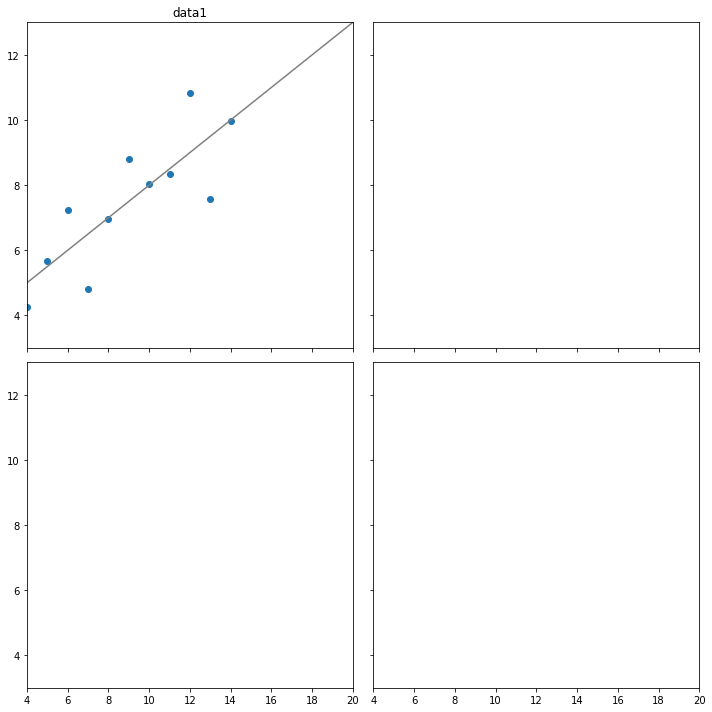

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10),
                         sharex=True, sharey=True)

xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
  poly_fit = np.polyfit(data[:,0],data[:,1],1)
  poly_1d = np.poly1d(poly_fit)
  ys = poly_1d(xs)
  # 그리는 영역 선택
  ax = axes[i//2, i%2]
  ax.set_xlim([4,20])
  ax.set_ylim([3,13])
  # 타이틀 부여
  ax.set_title(f'data{i+1}')
  ax.scatter(data[:,0],data[:,1])
  ax.plot(xs, ys, color='gray')

  # 그래프 사이의 간격을 좁힘
  plt.tight_layout()
  plt.show()